<a href="https://colab.research.google.com/github/ReyanPatel/ReyanPatel/blob/main/PneumoniaDemographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding the Dataset**

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [200]:
med_df = pd.read_csv('medical_conditions_dataset.csv')
med_df.head(10)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic
5,6,User0006,40.0,male,Non-Smoker,33.840723,NaN,NaN,Diabetic
6,7,User0007,49.0,male,Smoker,NaN,NaN,153.151126,Cancer
7,8,User0008,47.0,male,Non-Smoker,NaN,115.826322,199.339699,Diabetic
8,9,User0009,NaN,male,Non-Smoker,39.649679,NaN,NaN,Diabetic
9,10,User0010,65.0,male,Smoker,NaN,NaN,NaN,Diabetic


In [201]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB


In [202]:
med_df.describe()

,id,age,bmi,blood_pressure,glucose_levels
count,10000.00000,5445.000000,4652.000000,3766.000000,4756.000000
mean,5000.50000,53.541598,27.423420,135.209429,135.219608
std,2886.89568,20.925113,7.231257,26.041531,37.607638
min,1.00000,18.000000,15.012119,90.009620,70.015961
25%,2500.75000,35.000000,21.077894,113.107754,102.273703
50%,5000.50000,54.000000,27.326204,134.821040,135.436764
75%,7500.25000,72.000000,33.689330,157.949509,168.349011
max,10000.00000,89.000000,39.998687,179.999359,199.890429


In [203]:
med_df = med_df.drop('id', axis=1)
med_df.tail(7)

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
9993,User9994,NaN,male,Non-Smoker,NaN,127.165293,NaN,Pneumonia
9994,User9995,34.0,male,Non-Smoker,NaN,NaN,181.152892,Diabetic
9995,User9996,NaN,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9996,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Diabetic
9997,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia
9998,User9999,NaN,female,Non-Smoker,NaN,NaN,NaN,Pneumonia
9999,User10000,27.0,male,Non-Smoker,25.454891,NaN,196.083267,Diabetic


In [204]:
med_df.shape

(10000, 8)

In [205]:
med_df.condition.value_counts().sort_values(ascending=False)

,count
condition,
Diabetic,6013
Pneumonia,2527
Cancer,1460


In [206]:
med_df[med_df['condition']=='Pneumonia'].count()

,0
full_name,2527
age,1376
gender,2527
smoking_status,2527
bmi,1177
blood_pressure,947
glucose_levels,1172
condition,2527


In [207]:
pneumonia_df = med_df[med_df.condition=='Pneumonia']
pneumonia_df.head()

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
2,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
10,User0011,NaN,female,Non-Smoker,NaN,NaN,187.633751,Pneumonia
15,User0016,NaN,male,Non-Smoker,38.571576,NaN,NaN,Pneumonia


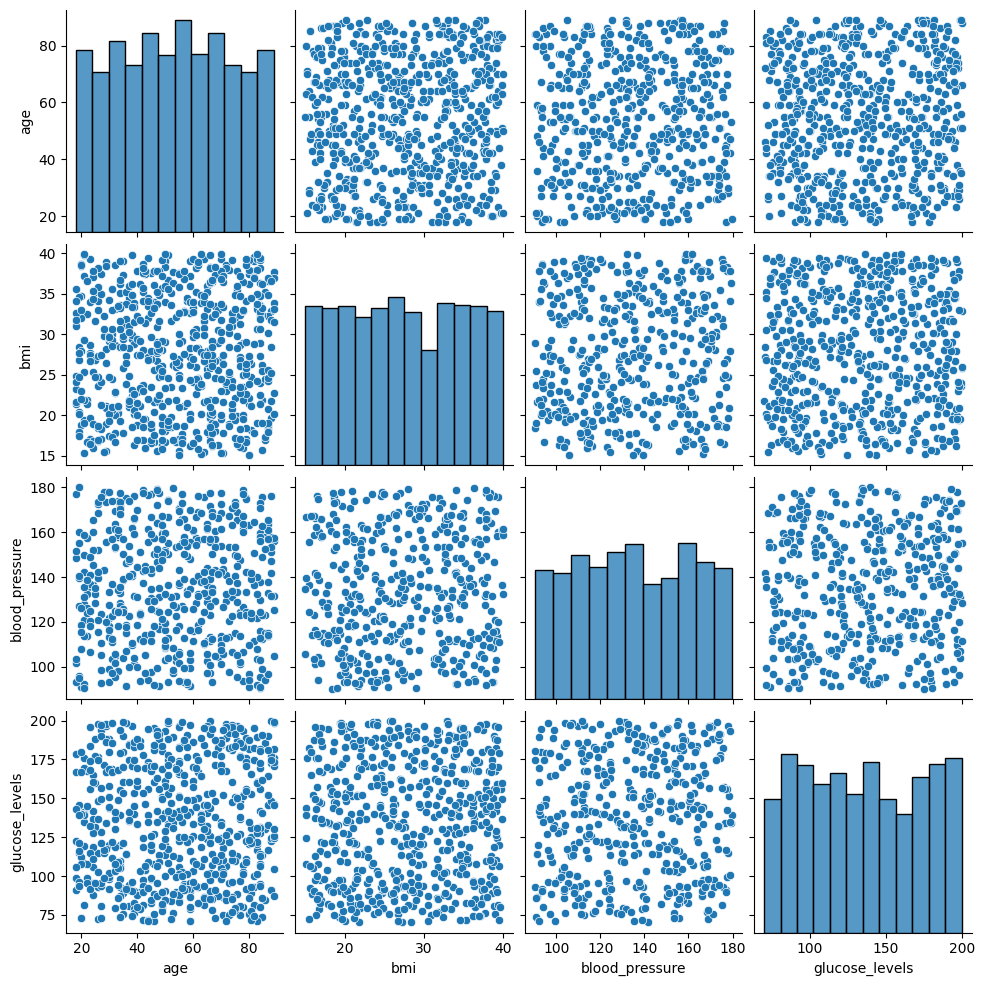

In [208]:
# Check basic pairplot for analysis
sns.pairplot(pneumonia_df)

In [209]:
pneumonia_df.isnull().sum()

,0
full_name,0
age,1151
gender,0
smoking_status,0
bmi,1350
blood_pressure,1580
glucose_levels,1355
condition,0


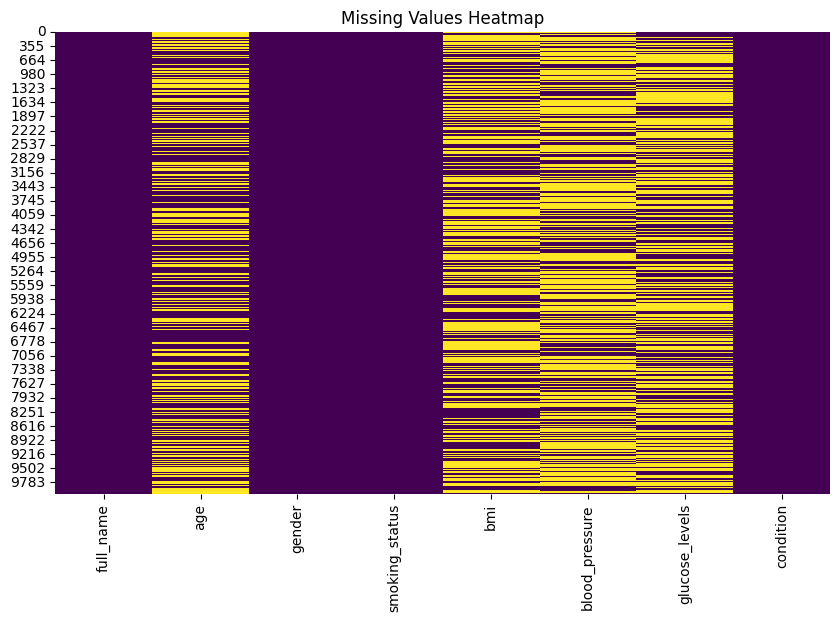

In [210]:
plt.figure(figsize=(10, 6))
sns.heatmap(pneumonia_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [211]:
print(pneumonia_df.age.min())
print("--"*2)
print(pneumonia_df.age.max())
print("--"*2)
len(pneumonia_df)

18.0
----
89.0
----


2527

In [212]:
## Clean data for each one that contatins null values

In [213]:
pneumonia_df.isnull().sum()

,0
full_name,0
age,1151
gender,0
smoking_status,0
bmi,1350
blood_pressure,1580
glucose_levels,1355
condition,0


# **Age Analysis**

In [214]:
pneumonia_df

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
2,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
10,User0011,NaN,female,Non-Smoker,NaN,NaN,187.633751,Pneumonia
15,User0016,NaN,male,Non-Smoker,38.571576,NaN,NaN,Pneumonia
...,...,...,...,...,...,...,...,...
9992,User9993,85.0,female,Non-Smoker,NaN,98.812356,NaN,Pneumonia
9993,User9994,NaN,male,Non-Smoker,NaN,127.165293,NaN,Pneumonia
9995,User9996,NaN,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9997,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia


In [215]:
pneumonia_df_age = pneumonia_df['age']
pneumonia_df_age.isnull().sum()

np.int64(1151)

In [216]:
len(pneumonia_df) - pneumonia_df_age.isnull().sum()

np.int64(1376)

In [217]:
print(pneumonia_df_age.min())
print(pneumonia_df_age.max())

pneumonia_df_age.agg(['mean', 'median', 'min', 'max'])

18.0
89.0


,age
mean,53.425145
median,54.000000
min,18.000000
max,89.000000


/tmp/ipython-input-218-4000542799.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


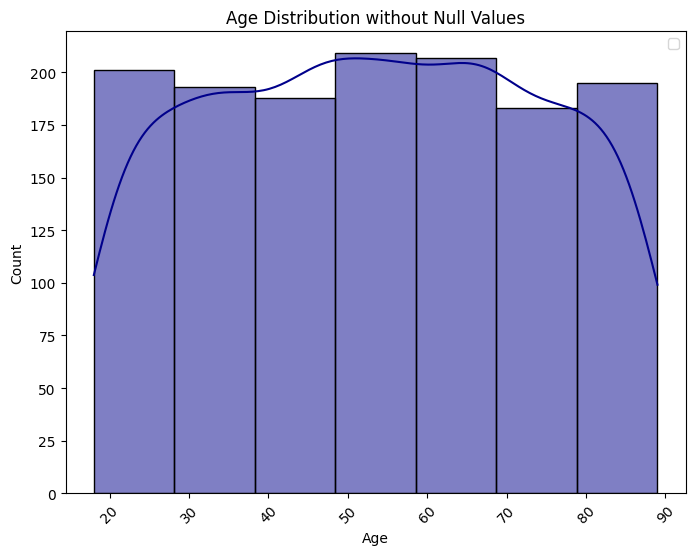

In [218]:
## Check the age distribution without the null values
plt.figure(figsize=(8, 6))
sns.histplot(pneumonia_df_age.dropna(), bins=7, kde=True, color='darkblue')

plt.xticks(rotation=45)
plt.title('Age Distribution without Null Values')
plt.xlabel('Age')
plt.legend()
plt.show()

In [219]:
## Use stratified imputation because ~50% of data removal is not the best approach
def stratified_age_impute():

    random_group_choice = np.random.choice(['<=25', '26-64', '>=65'], p=[0.3, 0.1, 0.6])

    if random_group_choice == '<=25':
        return np.random.randint(18, 26)

    elif random_group_choice == '25-64':
        return np.random.randint(26, 65)

    else:
        return np.random.randint(65, 90)


pneumonia_df_age = pneumonia_df_age.apply(lambda value: stratified_age_impute() if pd.isnull(value) else value)
pneumonia_df_age

,age
0,85.0
2,18.0
3,70.0
10,72.0
15,25.0
...,...
9992,85.0
9993,20.0
9995,81.0
9997,23.0


/tmp/ipython-input-220-3131741281.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


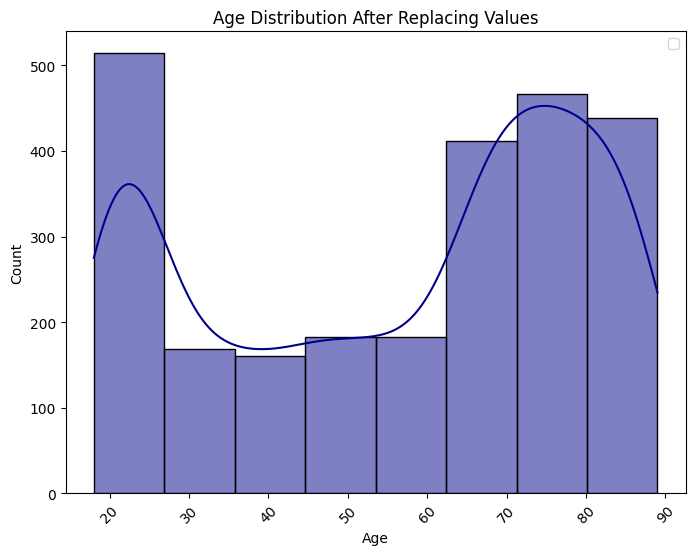

In [220]:
# After null values are replace =d
plt.figure(figsize=(8, 6))
sns.histplot(pneumonia_df_age, bins=8, kde=True, color='darkblue')

plt.xticks(rotation=45)
plt.title('Age Distribution After Replacing Values')
plt.xlabel('Age')
plt.legend()
plt.show()

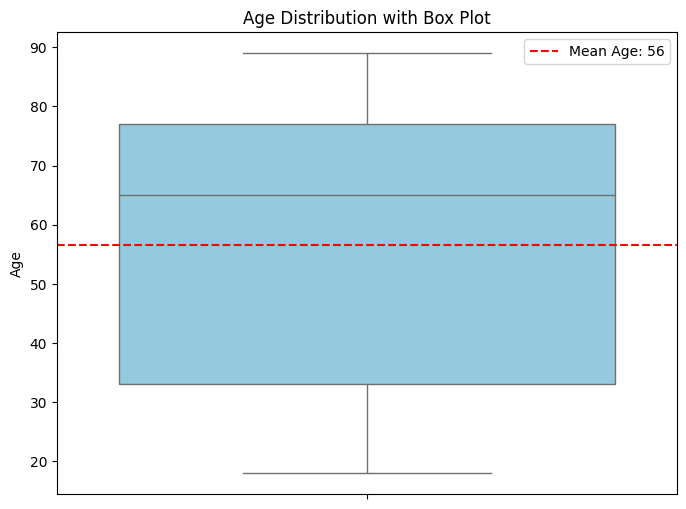

In [221]:
mean_age = pneumonia_df_age.mean()

plt.figure(figsize=(8, 6))
sns.boxplot(pneumonia_df_age, color='skyblue')

plt.axhline(mean_age, linestyle='--', color='red', label=f'Mean Age: {round(mean_age)}')
plt.title('Age Distribution with Box Plot')
plt.ylabel('Age')
plt.legend()
plt.show()

In [222]:
pneumonia_df_age.agg(['min', 'max'])

,age
min,18.0
max,89.0


In [223]:
## Updated all the values on age column in pneumonia data frame

pneumonia_df['age'] = pneumonia_df_age
pneumonia_df

/tmp/ipython-input-223-4254066880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pneumonia_df['age'] = pneumonia_df_age


,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,User0001,85.0,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
2,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,User0004,70.0,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
10,User0011,72.0,female,Non-Smoker,NaN,NaN,187.633751,Pneumonia
15,User0016,25.0,male,Non-Smoker,38.571576,NaN,NaN,Pneumonia
...,...,...,...,...,...,...,...,...
9992,User9993,85.0,female,Non-Smoker,NaN,98.812356,NaN,Pneumonia
9993,User9994,20.0,male,Non-Smoker,NaN,127.165293,NaN,Pneumonia
9995,User9996,81.0,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9997,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia


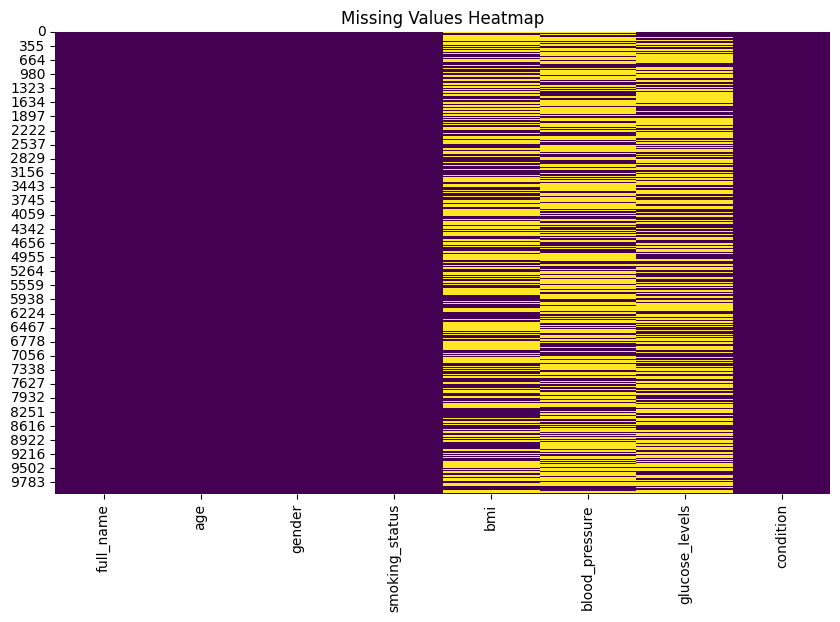

In [224]:
plt.figure(figsize=(10, 6))
sns.heatmap(pneumonia_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
## Age missing value is filled

# **Gender Analysis**

In [225]:
pneumonia_male_df = pneumonia_df[pneumonia_df['gender'] == 'male']
pneumonia_female_df = pneumonia_df[pneumonia_df['gender'] == 'female']

print(pneumonia_male_df.head())
print(pneumonia_female_df.head())

   full_name   age gender smoking_status        bmi  blood_pressure  \
0   User0001  85.0   male     Non-Smoker        NaN             NaN   
2   User0003  18.0   male     Non-Smoker  35.612486             NaN   
3   User0004  70.0   male     Non-Smoker        NaN       99.119829   
15  User0016  25.0   male     Non-Smoker  38.571576             NaN   
21  User0022  27.0   male     Non-Smoker        NaN             NaN   

    glucose_levels  condition  
0              NaN  Pneumonia  
2              NaN  Pneumonia  
3              NaN  Pneumonia  
15             NaN  Pneumonia  
21             NaN  Pneumonia  
    full_name   age  gender smoking_status        bmi  blood_pressure  \
10   User0011  72.0  female     Non-Smoker        NaN             NaN   
37   User0038  65.0  female     Non-Smoker  21.943122       130.31189   
108  User0109  88.0  female     Non-Smoker        NaN             NaN   
155  User0156  58.0  female     Non-Smoker        NaN             NaN   
173  User0174  7

/tmp/ipython-input-226-799279802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pneumonia_df, x='gender', palette='viridis')


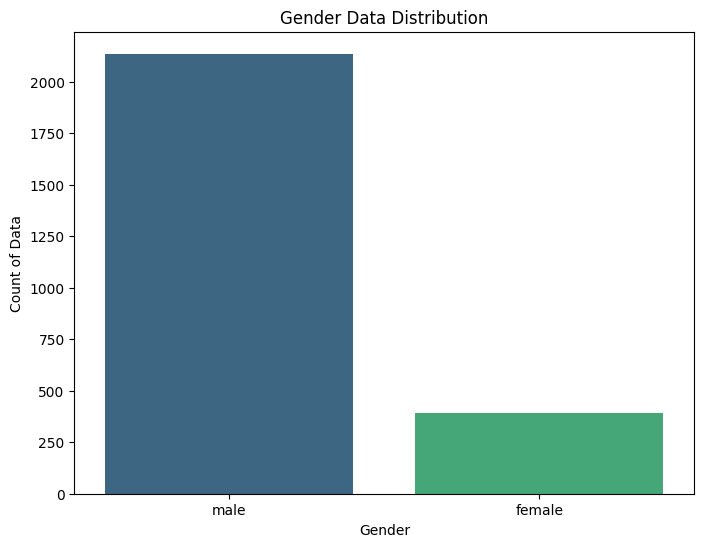

In [226]:
plt.figure(figsize=(8, 6))
sns.countplot(data=pneumonia_df, x='gender', palette='viridis')
plt.title('Gender Data Distribution')
plt.xlabel('Gender')
plt.ylabel('Count of Data')
plt.show()
## Female has far more less data than male (male is more likely to get pneumonia)

In [227]:
print(len(pneumonia_male_df))
print(len(pneumonia_female_df))
print(f"The male dataset has more than {round(2136/391, 1)} times the amount of data that female has")

2136
391
The male dataset has more than 5.5 times the amount of data that female has


In [228]:
pneumonia_df

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,User0001,85.0,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
2,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,User0004,70.0,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
10,User0011,72.0,female,Non-Smoker,NaN,NaN,187.633751,Pneumonia
15,User0016,25.0,male,Non-Smoker,38.571576,NaN,NaN,Pneumonia
...,...,...,...,...,...,...,...,...
9992,User9993,85.0,female,Non-Smoker,NaN,98.812356,NaN,Pneumonia
9993,User9994,20.0,male,Non-Smoker,NaN,127.165293,NaN,Pneumonia
9995,User9996,81.0,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9997,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia


# **Smoking Status Analysis**

In [229]:
pneumonia_df['smoking_status'].isnull().sum()
## No null values

np.int64(0)

In [230]:
print(len(pneumonia_df[pneumonia_df['smoking_status'] == 'Smoker']))
print(len(pneumonia_df[pneumonia_df['smoking_status'] == 'Non-Smoker']))

246
2281


/tmp/ipython-input-231-3064197136.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(pneumonia_df, x='smoking_status', palette='viridis')


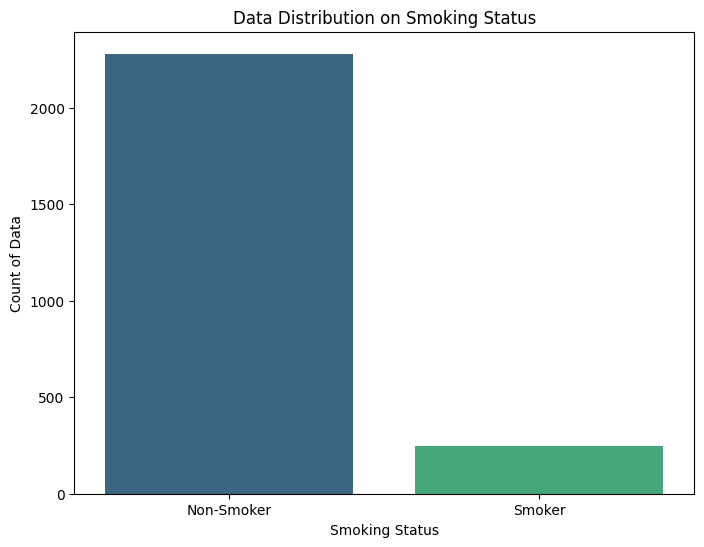

In [231]:
plt.figure(figsize=(8, 6))
sns.countplot(pneumonia_df, x='smoking_status', palette='viridis')
plt.title('Data Distribution on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count of Data')
plt.show()

In [232]:
## Calculate the percent of non-smokers vs smokers
percent_smokers = round((246/(246+2281)*100), 2)
percent_nonsmokers = round((2281/(246+2281)*100), 2)

print(f'Percent of smokers: {percent_smokers}%\nPercent of smokers: {percent_nonsmokers}%')

Percent of smokers: 9.73%
Percent of smokers: 90.27%


In [233]:
pneumonia_df.head()

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,User0001,85.0,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
2,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,User0004,70.0,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
10,User0011,72.0,female,Non-Smoker,NaN,NaN,187.633751,Pneumonia
15,User0016,25.0,male,Non-Smoker,38.571576,NaN,NaN,Pneumonia


# **BMI Analysis**

In [234]:
pneumonia_bmi = pneumonia_df['bmi']
print(len(pneumonia_bmi))
pneumonia_bmi.head(10)

2527


,bmi
0,NaN
2,35.612486
3,NaN
10,NaN
15,38.571576
21,NaN
22,28.025453
23,19.455914
27,20.179914
34,NaN


In [235]:
pneumonia_bmi.max()
pneumonia_bmi.min()

15.030443222606008

In [236]:
pneumonia_bmi.isnull().sum()

np.int64(1350)

In [237]:
## Check how bmi distribution right now
bmi_bins = pd.cut(
    pneumonia_bmi.dropna(),
    bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 40.0],
    labels=['Under Weight', 'Normal Weight', 'Over Weight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III']
)

bmi_mean = round(pneumonia_bmi.dropna().mean(), 2)
bmi_median = round(pneumonia_bmi.dropna().median(), 2)

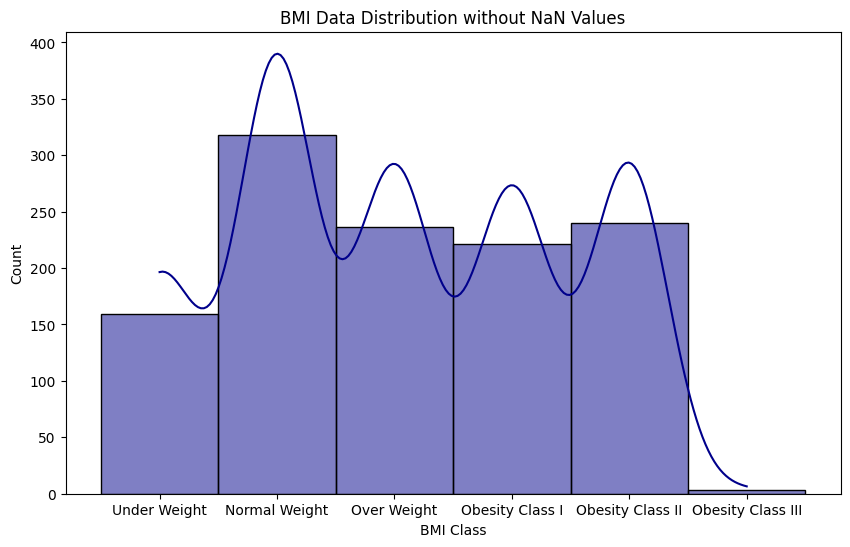

In [238]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bmi_bins, color='darkblue', kde=True)
plt.title('BMI Data Distribution without NaN Values')
plt.xlabel('BMI Class')
plt.show()

In [239]:
# Still don't want to remove all the data, going to use stratified imputation
def stratified_bmi_impute():

    random_group_choice = np.random.choice(['<=18.5', '18.6-24.9', '25-29.9', '30-34.9', '35-39.9', '>=40'],
                                           p=[0.35,0.1, 0.1, 0.12, 0.15, 0.18])

    if random_group_choice == '<=18.5':
        return round(np.random.uniform(15, 18.6), 4)

    elif random_group_choice == '18.6-24.9':
        return round(np.random.uniform(18.6, 25), 4)

    elif random_group_choice == '25-29.9':
        return round(np.random.uniform(25, 30), 4)

    elif random_group_choice == '30-34.9':
        return round(np.random.uniform(30, 35), 4)

    elif random_group_choice == '35-39.9':
        return round(np.random.uniform(35, 40), 4)

    else:
        return round(np.random.uniform(40, 41), 4)


pneumonia_bmi = pneumonia_bmi.apply(lambda value: stratified_bmi_impute() if pd.isnull(value) else value)
pneumonia_bmi

# [0, 18.5, 24.9, 29.9, 34.9, 39.9, 40.0]

,bmi
0,22.806300
2,35.612486
3,35.581400
10,17.733600
15,38.571576
...,...
9992,40.583900
9993,18.289600
9995,25.029002
9997,40.632400


In [240]:
pneumonia_df['bmi']=pneumonia_bmi
pneumonia_df

/tmp/ipython-input-240-2533629307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pneumonia_df['bmi']=pneumonia_bmi


,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,User0001,85.0,male,Non-Smoker,22.806300,NaN,NaN,Pneumonia
2,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,User0004,70.0,male,Non-Smoker,35.581400,99.119829,NaN,Pneumonia
10,User0011,72.0,female,Non-Smoker,17.733600,NaN,187.633751,Pneumonia
15,User0016,25.0,male,Non-Smoker,38.571576,NaN,NaN,Pneumonia
...,...,...,...,...,...,...,...,...
9992,User9993,85.0,female,Non-Smoker,40.583900,98.812356,NaN,Pneumonia
9993,User9994,20.0,male,Non-Smoker,18.289600,127.165293,NaN,Pneumonia
9995,User9996,81.0,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9997,User9998,23.0,male,Smoker,40.632400,148.833321,173.931480,Pneumonia


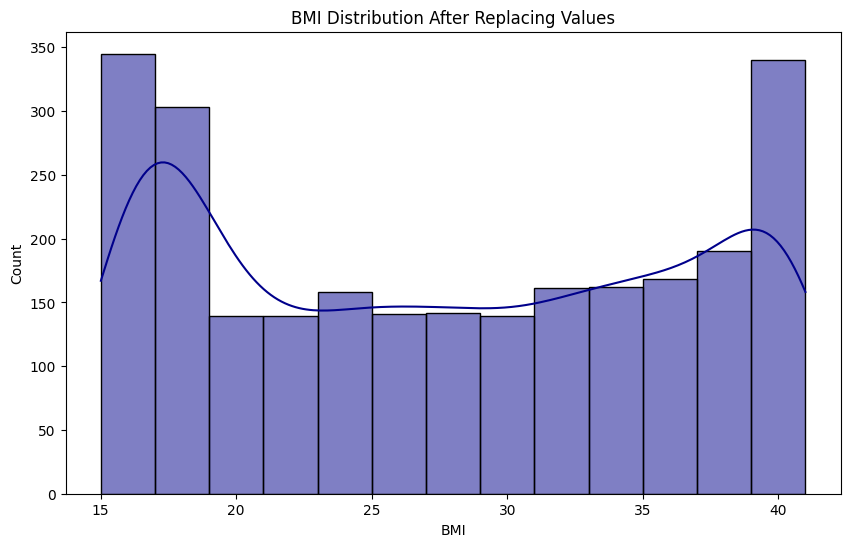

In [241]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pneumonia_bmi, kde=True, color='darkblue')
plt.title('BMI Distribution After Replacing Values')
plt.xlabel('BMI')
plt.show()

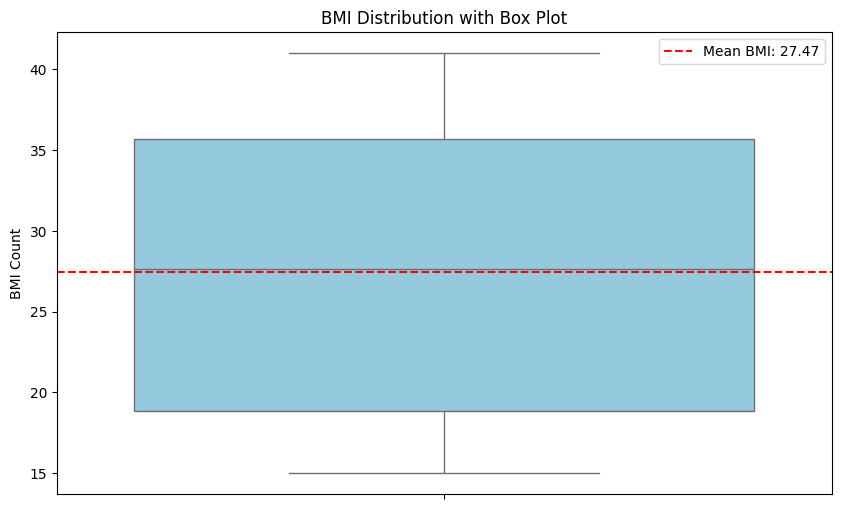

In [242]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pneumonia_bmi, color='skyblue')
plt.title('BMI Distribution with Box Plot')
plt.axhline(bmi_mean, linestyle='--', color='red', label=f'Mean BMI: {bmi_mean}')
plt.ylabel('BMI Count')
plt.legend()
plt.show()

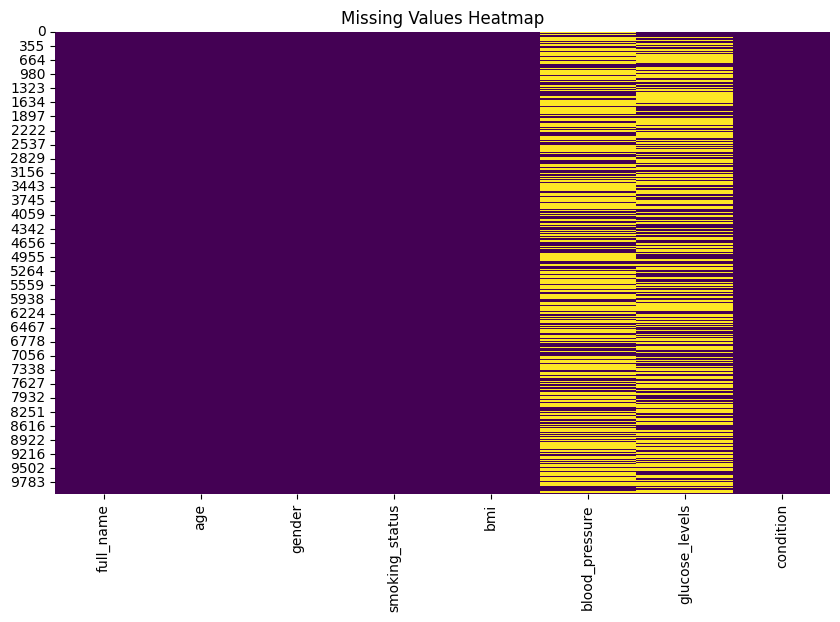

In [243]:
plt.figure(figsize=(10, 6))
sns.heatmap(pneumonia_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
## BMI missing value is filled

# **Blood Pressure Analysis**

In [244]:
pneumonia_df['blood_pressure']

,blood_pressure
0,NaN
2,NaN
3,99.119829
10,NaN
15,NaN
...,...
9992,98.812356
9993,127.165293
9995,152.540355
9997,148.833321


In [245]:
## High blood pressure (Systolic: 130-139) and (Diastolic: 80-89)
pneumonia_bp = pneumonia_df['blood_pressure']
pneumonia_bp.agg(['min', 'max', 'mean', 'median'])

,blood_pressure
min,90.118260
max,179.963748
mean,135.051634
median,134.536675


In [246]:
print(pneumonia_bp.isnull().sum())
print(len(pneumonia_bp))
print(2527-1580) # More than half the pd.Series is null

1580
2527
947


/tmp/ipython-input-247-2207904383.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_max = bp.groupby(bp_cat).max().sort_values()


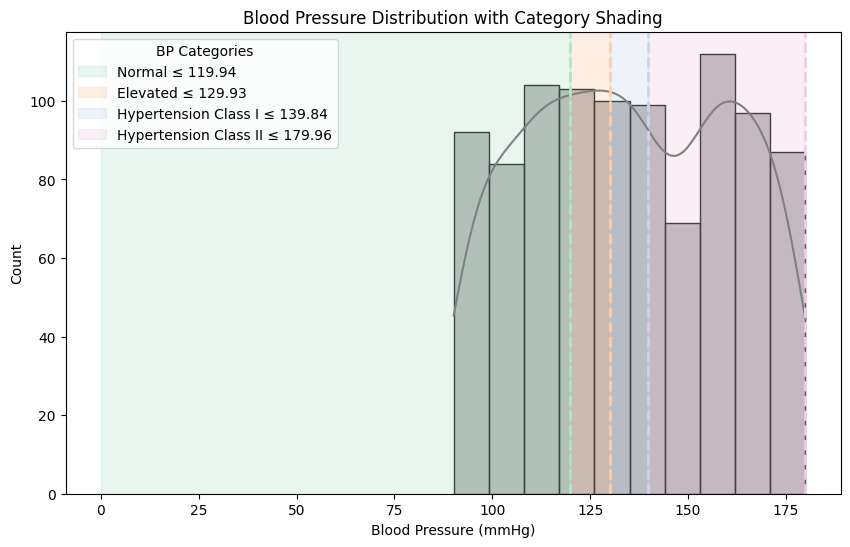

In [247]:
# Filter out missing values
plt.figure(figsize=(10, 6))
bp = pneumonia_df['blood_pressure'].dropna()

# Define categories (example cutoffs)
bins = [bp.min(), 120, 130, 140, bp.max()]
labels = ['Normal', 'Elevated', 'Hypertension Class I', 'Hypertension Class II']
bp_cat = pd.cut(bp, bins=bins, labels=labels, include_lowest=True)

# Calculate max value per category
category_max = bp.groupby(bp_cat).max().sort_values()

# Plot histogram
sns.histplot(bp, bins=10, color='gray', alpha=0.6, kde=True)

colors = ['#B3E2CD', '#FDCDAC', '#CBD5E8', '#F4CAE4']
start = 0

# +

for (cat, max_val), color in zip(category_max.items(), colors):
    plt.axvspan(start, max_val, alpha=0.3, color=color, label=f"{cat} ≤ {round(max_val, 2)}")
    plt.axvline(max_val, color=color, linestyle='--', linewidth=2)
    start = max_val

plt.title("Blood Pressure Distribution with Category Shading")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.legend(title="BP Categories")
plt.show()

In [248]:
### Using the stratified imputation technique for all null values

def stratified_bp_impute():

    random_group_choice = np.random.choice(['90-120', '120-129', '130-139', '140-179'],
                                           p=[0.1, 0.2, 0.25, 0.45])

    if random_group_choice == '90-120':
        return round(np.random.uniform(pneumonia_bp.min(), 120), 6)

    elif random_group_choice == '120-129':
        return round(np.random.uniform(120, 129), 6)

    elif random_group_choice == '130-139':
        return round(np.random.uniform(130, 139), 6)

    else:
        return round(np.random.uniform(140, pneumonia_bp.max()), 6)

pneumonia_bp = pneumonia_bp.apply(lambda value: stratified_bp_impute() if pd.isnull(value) else value)
pneumonia_bp

# [0, 18.5, 24.9, 29.9, 34.9, 39.9, 40.0]

,blood_pressure
0,177.240879
2,170.249584
3,99.119829
10,120.670495
15,91.786162
...,...
9992,98.812356
9993,127.165293
9995,152.540355
9997,148.833321


In [249]:
pneumonia_bp.isnull().sum()
pneumonia_df['blood_pressure'] = pneumonia_bp
pneumonia_df

/tmp/ipython-input-249-3532163937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pneumonia_df['blood_pressure'] = pneumonia_bp


,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,User0001,85.0,male,Non-Smoker,22.806300,177.240879,NaN,Pneumonia
2,User0003,18.0,male,Non-Smoker,35.612486,170.249584,NaN,Pneumonia
3,User0004,70.0,male,Non-Smoker,35.581400,99.119829,NaN,Pneumonia
10,User0011,72.0,female,Non-Smoker,17.733600,120.670495,187.633751,Pneumonia
15,User0016,25.0,male,Non-Smoker,38.571576,91.786162,NaN,Pneumonia
...,...,...,...,...,...,...,...,...
9992,User9993,85.0,female,Non-Smoker,40.583900,98.812356,NaN,Pneumonia
9993,User9994,20.0,male,Non-Smoker,18.289600,127.165293,NaN,Pneumonia
9995,User9996,81.0,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9997,User9998,23.0,male,Smoker,40.632400,148.833321,173.931480,Pneumonia


/tmp/ipython-input-250-4122944817.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_max = bp.groupby(bp_cat).max().sort_values()


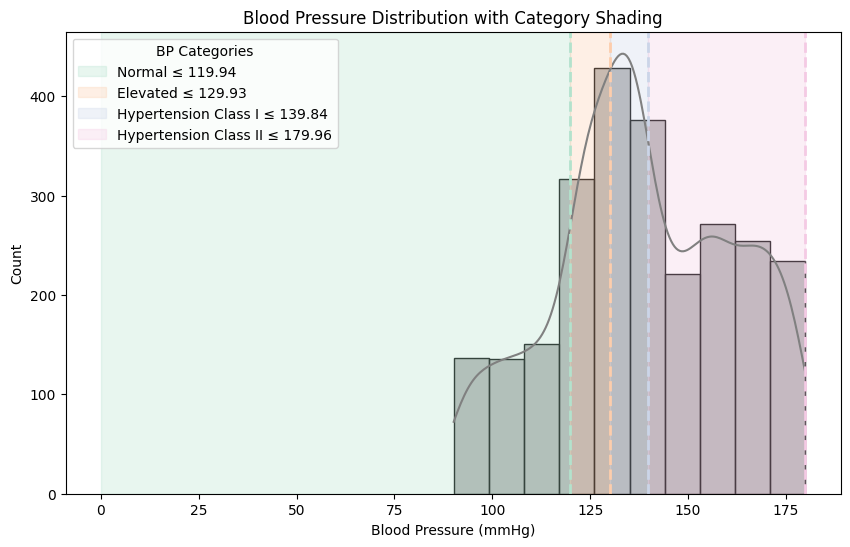

In [250]:
# Create the categorized histogram again
plt.figure(figsize=(10, 6))
bp = pneumonia_df['blood_pressure']

# Define categories (example cutoffs)
bins = [bp.min(), 120, 130, 140, bp.max()]
labels = ['Normal', 'Elevated', 'Hypertension Class I', 'Hypertension Class II']
bp_cat = pd.cut(bp, bins=bins, labels=labels, include_lowest=True)

# Calculate max value per category
category_max = bp.groupby(bp_cat).max().sort_values()

# Plot histogram
sns.histplot(bp, bins=10, color='gray', alpha=0.6, kde=True)

colors = ['#B3E2CD', '#FDCDAC', '#CBD5E8', '#F4CAE4']
start = 0

# +

for (cat, max_val), color in zip(category_max.items(), colors):
    plt.axvspan(start, max_val, alpha=0.3, color=color, label=f"{cat} ≤ {round(max_val, 2)}")
    plt.axvline(max_val, color=color, linestyle='--', linewidth=2)
    start = max_val

plt.title("Blood Pressure Distribution with Category Shading")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.legend(title="BP Categories")
plt.show()

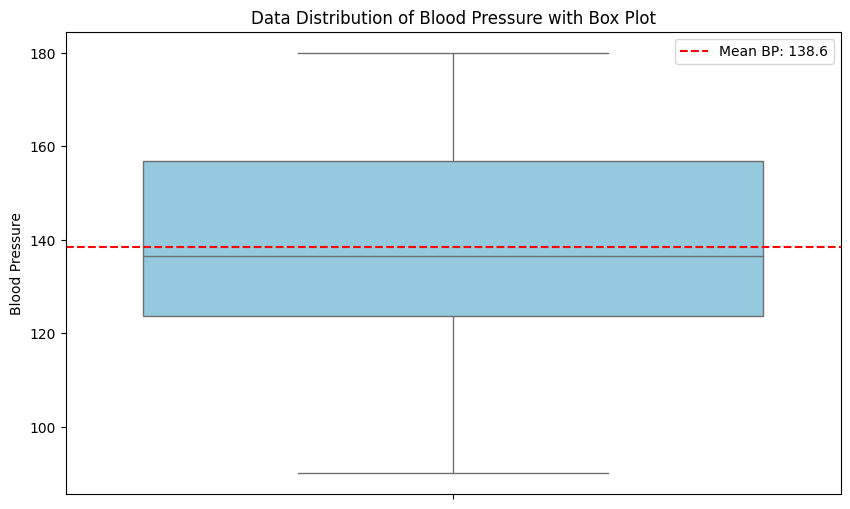

In [251]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pneumonia_bp, color='skyblue')
plt.axhline(pneumonia_bp.mean(), linestyle='--', color='red', label=f'Mean BP: {round(pneumonia_bp.mean(), 2)}')
plt.title('Data Distribution of Blood Pressure with Box Plot')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

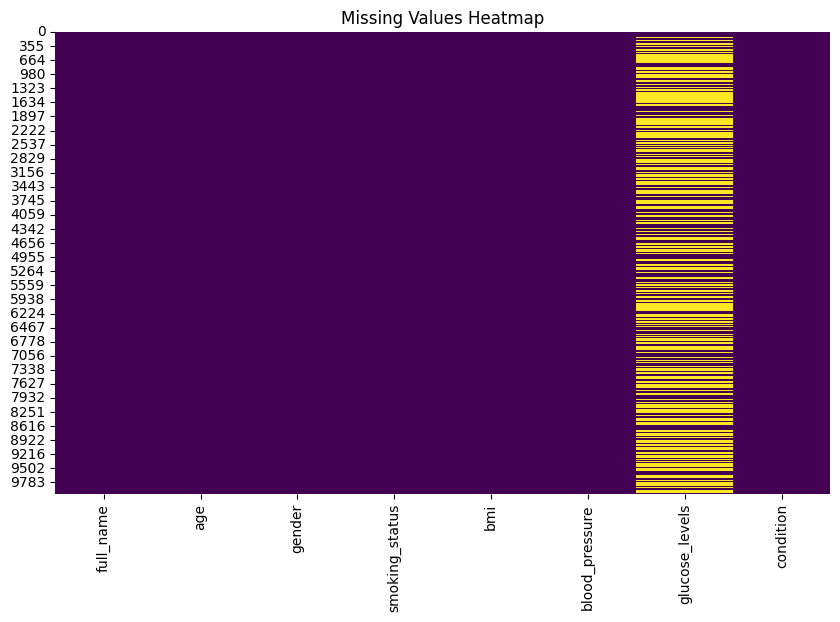

In [252]:
plt.figure(figsize=(10, 6))
sns.heatmap(pneumonia_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# **Glucose Levels Analysis**

In [253]:
pneumonia_glucose = pneumonia_df['glucose_levels']
pneumonia_glucose.head(10)

,glucose_levels
0,NaN
2,NaN
3,NaN
10,187.633751
15,NaN
21,NaN
22,150.628025
23,NaN
27,153.673688
34,85.852450


In [254]:
print(pneumonia_glucose.isnull().sum())
print(len(pneumonia_glucose))
print(len(pneumonia_glucose) - pneumonia_glucose.isnull().sum()) # 1172 values that are non-null

1355
2527
1172


In [255]:
pneumonia_glucose.agg(['min', 'max', 'mean', 'median'])

,glucose_levels
min,70.015961
max,199.861741
mean,135.301281
median,134.899292


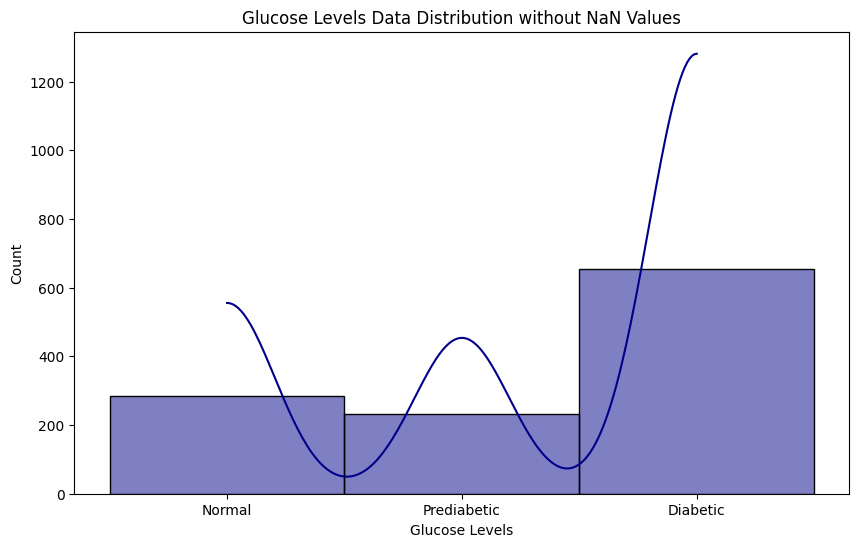

In [256]:
bins_glucose = pd.cut(
    pneumonia_glucose.dropna(),
    bins=[pneumonia_glucose.min(), 100, 126, pneumonia_glucose.max()],
    labels=['Normal', 'Prediabetic', 'Diabetic']
)

plt.figure(figsize=(10, 6))
sns.histplot(bins_glucose, bins=3, color='darkblue', kde=True)
plt.title('Glucose Levels Data Distribution without NaN Values')
plt.xlabel('Glucose Levels')
plt.show()

In [257]:
# One final use of stratified imputation
### Using the stratified imputation technique for all null values

def stratified_glucose_impute():

    random_group_choice = np.random.choice(['<=100', '101-125', '126=<'],
                                           p=[0.2, 0.35, 0.45])

    if random_group_choice == '<=100':
        return round(np.random.uniform(pneumonia_glucose.min(), 100), 6)

    elif random_group_choice == '101-125':
        return round(np.random.uniform(101, 126), 6)

    else:
        return round(np.random.uniform(126, pneumonia_bp.max()), 6)

pneumonia_glucose = pneumonia_glucose.apply(lambda value: stratified_glucose_impute() if pd.isnull(value) else value)
pneumonia_glucose

,glucose_levels
0,78.086833
2,158.480106
3,174.099388
10,187.633751
15,73.580623
...,...
9992,76.993533
9993,73.405679
9995,137.551451
9997,173.931480


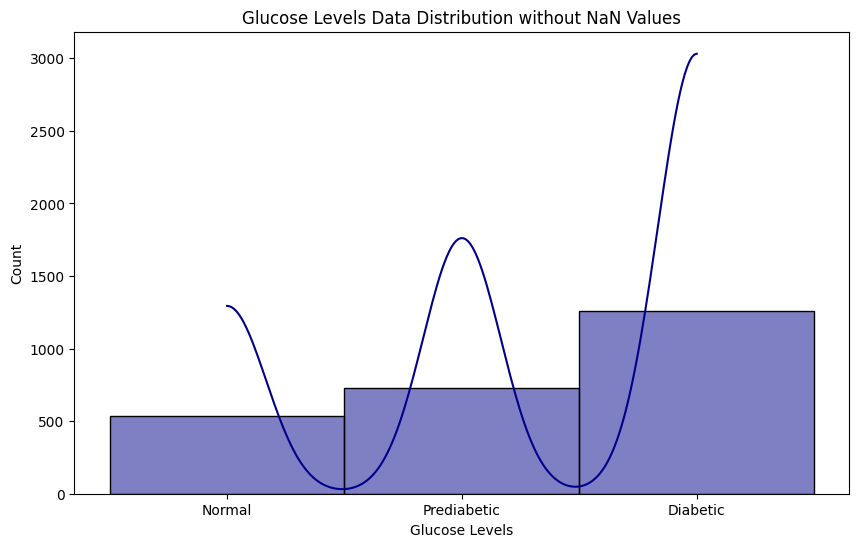

In [258]:
bins_glucose = pd.cut(
    pneumonia_glucose,
    bins=[pneumonia_glucose.min(), 100, 126, pneumonia_glucose.max()],
    labels=['Normal', 'Prediabetic', 'Diabetic']
)

plt.figure(figsize=(10, 6))
sns.histplot(bins_glucose, bins=3, color='darkblue', kde=True)
plt.title('Glucose Levels Data Distribution without NaN Values')
plt.xlabel('Glucose Levels')
plt.show()

/tmp/ipython-input-259-4216819296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pneumonia_df['glucose_levels'] = pneumonia_glucose


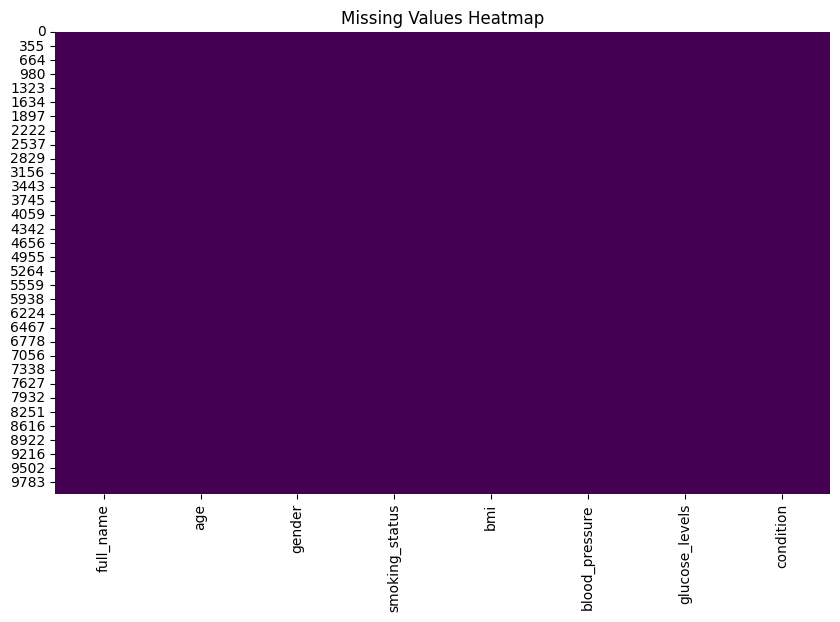

In [259]:
pneumonia_df['glucose_levels'] = pneumonia_glucose

plt.figure(figsize=(10, 6))
sns.heatmap(pneumonia_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# **Create the Severity Column**

In [260]:
## Basically, we want to create a severity column so that our ML algorithm can predict based on the rows
# Now that we have all the rows in one column

In [261]:
# Classifying the severity of each patient (by row)

def boolean_class(row):
    count = 0
    count += 2 if row.age <= 2 or row.age >= 65 else 1
    count += 2 if row.smoking_status == 'Smoker' else 1
    count += 0 if row.glucose_levels <= 100 else 1 if row.glucose_levels < 126 else 2
    count += 0 if row.blood_pressure <= 120 else 1 if row.blood_pressure < 140 else 2
    count += 2 if row.gender == 'male' else 1
    count += 2 if row.bmi <= 18.5 or row.bmi >= 35 else 1
    return count

In [262]:
pneumonia_df['severity'] = pneumonia_df.apply(boolean_class, axis=1)

/tmp/ipython-input-262-2129877232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pneumonia_df['severity'] = pneumonia_df.apply(boolean_class, axis=1)


In [263]:
np.where(pneumonia_df['severity'] == 12)

(array([  20,   22,  321,  609,  820,  879, 1114, 1326, 1382, 1627, 1684,
        1688, 1738, 1949, 1962, 2099, 2362, 2469]),)

In [264]:
pneumonia_df['severity'].agg(['min', 'max', 'median', 'mean'])

,severity
min,4.000000
max,12.000000
median,9.000000
mean,8.497032


In [265]:
pneumonia_df

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition,severity
0,User0001,85.0,male,Non-Smoker,22.806300,177.240879,78.086833,Pneumonia,8
2,User0003,18.0,male,Non-Smoker,35.612486,170.249584,158.480106,Pneumonia,10
3,User0004,70.0,male,Non-Smoker,35.581400,99.119829,174.099388,Pneumonia,9
10,User0011,72.0,female,Non-Smoker,17.733600,120.670495,187.633751,Pneumonia,9
15,User0016,25.0,male,Non-Smoker,38.571576,91.786162,73.580623,Pneumonia,6
...,...,...,...,...,...,...,...,...,...
9992,User9993,85.0,female,Non-Smoker,40.583900,98.812356,76.993533,Pneumonia,6
9993,User9994,20.0,male,Non-Smoker,18.289600,127.165293,73.405679,Pneumonia,7
9995,User9996,81.0,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia,10
9997,User9998,23.0,male,Smoker,40.632400,148.833321,173.931480,Pneumonia,11


# **Sooooo...the model didn't work**

In [266]:
## When training the dataset, I used Logistic Regression (It is not regression but uses the sigmoid function to classify - binary or multiclass)
## I don't want to create biasness with demographic of patients with pneumonia only
## So I will the actual dataframe and filter

In [267]:
med_pneumonia_drop = med_df[med_df['condition']=='Pneumonia'].index
med_df.drop(med_pneumonia_drop, inplace=True)

In [268]:
med_df # Removed all the pneumonia datapoints

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
1,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
4,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic
5,User0006,40.0,male,Non-Smoker,33.840723,NaN,NaN,Diabetic
6,User0007,49.0,male,Smoker,NaN,NaN,153.151126,Cancer
7,User0008,47.0,male,Non-Smoker,NaN,115.826322,199.339699,Diabetic
...,...,...,...,...,...,...,...,...
9988,User9989,43.0,male,Non-Smoker,16.904985,132.998849,NaN,Diabetic
9990,User9991,83.0,male,Non-Smoker,26.125438,NaN,185.317924,Diabetic
9994,User9995,34.0,male,Non-Smoker,NaN,NaN,181.152892,Diabetic
9996,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Diabetic


In [269]:
med_df['condition'] = med_df['condition'].apply(lambda x: 'Pneumonia' if x == 'Pneumonia' else 'Non-Pneumonia')

In [270]:
med_df

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
1,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Non-Pneumonia
4,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Non-Pneumonia
5,User0006,40.0,male,Non-Smoker,33.840723,NaN,NaN,Non-Pneumonia
6,User0007,49.0,male,Smoker,NaN,NaN,153.151126,Non-Pneumonia
7,User0008,47.0,male,Non-Smoker,NaN,115.826322,199.339699,Non-Pneumonia
...,...,...,...,...,...,...,...,...
9988,User9989,43.0,male,Non-Smoker,16.904985,132.998849,NaN,Non-Pneumonia
9990,User9991,83.0,male,Non-Smoker,26.125438,NaN,185.317924,Non-Pneumonia
9994,User9995,34.0,male,Non-Smoker,NaN,NaN,181.152892,Non-Pneumonia
9996,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Non-Pneumonia


In [271]:
df = pd.concat([med_df.dropna(), pneumonia_df])

In [272]:
df

,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition,severity
63,User0064,43.0,male,Non-Smoker,34.978378,107.052200,190.482674,Non-Pneumonia,NaN
84,User0085,52.0,male,Smoker,25.024378,131.071030,185.997004,Non-Pneumonia,NaN
153,User0154,66.0,male,Smoker,24.333718,173.787158,130.727447,Non-Pneumonia,NaN
175,User0176,36.0,male,Non-Smoker,35.850038,108.044796,162.432142,Non-Pneumonia,NaN
184,User0185,57.0,male,Non-Smoker,34.232476,138.540306,147.717692,Non-Pneumonia,NaN
...,...,...,...,...,...,...,...,...,...
9992,User9993,85.0,female,Non-Smoker,40.583900,98.812356,76.993533,Pneumonia,6.0
9993,User9994,20.0,male,Non-Smoker,18.289600,127.165293,73.405679,Pneumonia,7.0
9995,User9996,81.0,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia,10.0
9997,User9998,23.0,male,Smoker,40.632400,148.833321,173.931480,Pneumonia,11.0


In [273]:
df.drop('severity',axis=1, inplace=True)

In [274]:
df[df['condition']=='Non-Pneumonia'].count()

,0
full_name,331
age,331
gender,331
smoking_status,331
bmi,331
blood_pressure,331
glucose_levels,331
condition,331


In [275]:
df[df['condition'] == 'Pneumonia'].count()

,0
full_name,2527
age,2527
gender,2527
smoking_status,2527
bmi,2527
blood_pressure,2527
glucose_levels,2527
condition,2527


In [276]:
df.drop('full_name', axis=1, inplace=True)

In [277]:
df

,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
63,43.0,male,Non-Smoker,34.978378,107.052200,190.482674,Non-Pneumonia
84,52.0,male,Smoker,25.024378,131.071030,185.997004,Non-Pneumonia
153,66.0,male,Smoker,24.333718,173.787158,130.727447,Non-Pneumonia
175,36.0,male,Non-Smoker,35.850038,108.044796,162.432142,Non-Pneumonia
184,57.0,male,Non-Smoker,34.232476,138.540306,147.717692,Non-Pneumonia
...,...,...,...,...,...,...,...
9992,85.0,female,Non-Smoker,40.583900,98.812356,76.993533,Pneumonia
9993,20.0,male,Non-Smoker,18.289600,127.165293,73.405679,Pneumonia
9995,81.0,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9997,23.0,male,Smoker,40.632400,148.833321,173.931480,Pneumonia


In [278]:
# Use One-Hot Encoding
df.gender = [1 if value == 'male' else 0 for value in df.gender]
df.smoking_status = [1 if value == 'Smoker' else 0 for value in df.smoking_status]
df.condition = [1 if value == 'Pneumonia' else 0 for value in df.condition]

In [279]:
df

,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
63,43.0,1,0,34.978378,107.052200,190.482674,0
84,52.0,1,1,25.024378,131.071030,185.997004,0
153,66.0,1,1,24.333718,173.787158,130.727447,0
175,36.0,1,0,35.850038,108.044796,162.432142,0
184,57.0,1,0,34.232476,138.540306,147.717692,0
...,...,...,...,...,...,...,...
9992,85.0,0,0,40.583900,98.812356,76.993533,1
9993,20.0,1,0,18.289600,127.165293,73.405679,1
9995,81.0,1,0,25.029002,152.540355,137.551451,1
9997,23.0,1,1,40.632400,148.833321,173.931480,1


<Axes: xlabel='gender'>

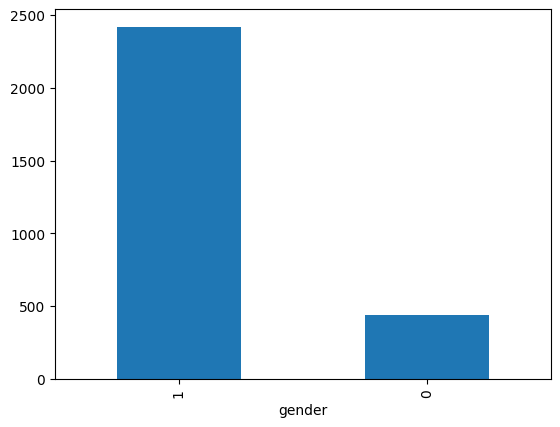

In [280]:
df['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='smoking_status'>

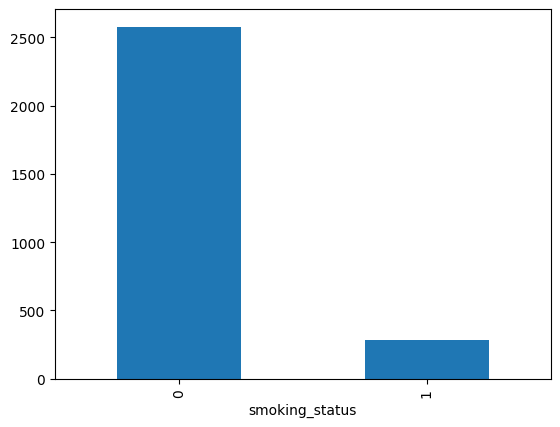

In [281]:
df['smoking_status'].value_counts().plot(kind='bar')

<Axes: xlabel='condition'>

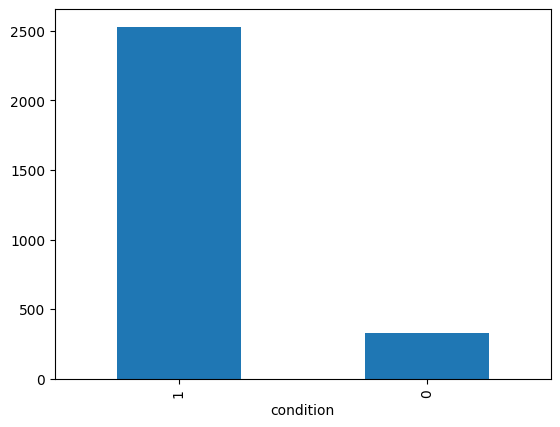

In [282]:
df['condition'].value_counts().plot(kind='bar')

In [285]:
# divide into target variable and predictors
y = df['condition'] # target var
X = df.drop(['condition'], axis=1)

In [286]:
y

,condition
63,0
84,0
153,0
175,0
184,0
...,...
9992,1
9993,1
9995,1
9997,1


In [287]:
X

,age,gender,smoking_status,bmi,blood_pressure,glucose_levels
63,43.0,1,0,34.978378,107.052200,190.482674
84,52.0,1,1,25.024378,131.071030,185.997004
153,66.0,1,1,24.333718,173.787158,130.727447
175,36.0,1,0,35.850038,108.044796,162.432142
184,57.0,1,0,34.232476,138.540306,147.717692
...,...,...,...,...,...,...
9992,85.0,0,0,40.583900,98.812356,76.993533
9993,20.0,1,0,18.289600,127.165293,73.405679
9995,81.0,1,0,25.029002,152.540355,137.551451
9997,23.0,1,1,40.632400,148.833321,173.931480


In [288]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

In [289]:
X_scaled

array([[-0.56715984,  0.42543123, -0.32956233,  0.86744487, -1.33585166,
         1.76929345],
       [-0.17925074,  0.42543123,  3.03432741, -0.3109602 , -0.29910181,
         1.63766325],
       [ 0.42416342,  0.42543123,  3.03432741, -0.39272401,  1.54469914,
         0.01580001],
       ...,
       [ 1.07067858,  0.42543123, -0.32956233, -0.31041272,  0.62760113,
         0.21604772],
       [-1.42918007,  0.42543123,  3.03432741,  1.53679662,  0.46759057,
         1.28360524],
       [ 1.28618364, -2.35055614, -0.32956233, -0.26899007,  1.12583582,
        -1.66482096]])

In [351]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)

In [352]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# predict the target variable on the test data
y_pred = lr.predict(X_test)

In [353]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [354]:
y_test

,condition
5302,1
8780,1
6787,1
1713,1
2322,1
...,...
3775,1
7500,1
9290,1
4839,1


In [355]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.91


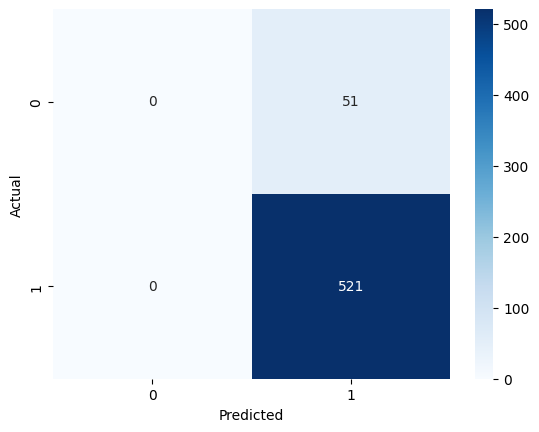

In [356]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is your test labels and y_pred is your model’s predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()